In [1]:
# !pip install pandas
# !pip install openpyxl
# !pip install seaborn

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore", "use_inf_as_na")

%matplotlib inline

## Data Preprocessing
Reading, processing and summarizing data

In [3]:
# Reading file and displaying first rows to see the structure of data
age = pd.read_excel('files/age.xlsx', sheet_name = 1)
age.head()

,Kod,Nazwa,Miesiące,Płeć,Grupy wieku,Rok,Wartosc,Jednostka miary,Atrybut
0,0,POLSKA,styczeń,ogółem,ogółem,2021,1090365,osoba,
1,0,POLSKA,styczeń,ogółem,ogółem,2022,927112,osoba,
2,0,POLSKA,styczeń,ogółem,ogółem,2023,857589,osoba,
3,0,POLSKA,styczeń,ogółem,ogółem,2024,837063,osoba,
4,0,POLSKA,styczeń,ogółem,18-24,2021,137430,osoba,


In [4]:
# Viewing columns and their datatypes
age.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 864 entries, 0 to 863
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Kod              864 non-null    int64 
 1   Nazwa            864 non-null    object
 2   Miesiące         864 non-null    object
 3   Płeć             864 non-null    object
 4   Grupy wieku      864 non-null    object
 5   Rok              864 non-null    int64 
 6   Wartosc          864 non-null    object
 7   Jednostka miary  864 non-null    object
 8   Atrybut          864 non-null    object
dtypes: int64(2), object(7)
memory usage: 60.9+ KB


In [5]:
# Viewing unique values for each column
for col in age:
    print(f"{col}:{age[col].unique()}")

Kod:[0]
Nazwa:['POLSKA']
Miesiące:['styczeń' 'luty' 'marzec' 'kwiecień' 'maj' 'czerwiec' 'lipiec' 'sierpień'
 'wrzesień' 'październik' 'listopad' 'grudzień']
Płeć:['ogółem' 'kobiety' 'mężczyźni']
Grupy wieku:['ogółem' '18-24' '25-34' '35-44' '45-54' '55 lat i więcej']
Rok:[2021 2022 2023 2024]
Wartosc:[1090365 927112 857589 837063 137430 105317 109007 109503 296091 239870
 209563 199686 272455 238798 219223 214852 204101 182850 174588 176267
 180288 160277 145208 136755 583351 495959 458269 437618 77328 59068 59271
 58625 191291 157062 136727 126405 158209 140491 129467 123722 102963
 91706 88527 87864 53560 47632 44277 41002 507014 431153 399320 399445
 60102 46249 49736 50878 104800 82808 72836 73281 114246 98307 89756 91130
 101138 91144 86061 88403 126728 112645 100931 95753 1099538 921760 864781
 '-' 137781 102976 109407 298639 239277 212213 275917 238131 221699 206205
 182322 176138 180996 159054 145324 585158 491319 460077 77143 57564 59430
 191722 155944 137278 159461 139553 13

In [6]:
# Cleaning up data - drop null data and irrelevant columns
age = age[age['Atrybut'] != 'n']
age.drop(['Kod', 'Nazwa', 'Jednostka miary', 'Atrybut'], axis = 1, inplace = True)
age.rename(columns={'Wartosc': 'Osoby'}, inplace=True)
age.head()

,Miesiące,Płeć,Grupy wieku,Rok,Osoby
0,styczeń,ogółem,ogółem,2021,1090365
1,styczeń,ogółem,ogółem,2022,927112
2,styczeń,ogółem,ogółem,2023,857589
3,styczeń,ogółem,ogółem,2024,837063
4,styczeń,ogółem,18-24,2021,137430


In [7]:
# Preparing month map to create date column
month_mapping = {
    'styczeń' : 1,
    'luty' : 2,
    'marzec' : 3,
    'kwiecień' : 4,
    'maj' : 5,
    'czerwiec' : 6,
    'lipiec' : 7,
    'sierpień' : 8,
    'wrzesień' : 9,
    'październik' : 10,
    'listopad' : 11,
    'grudzień' : 12
}

In [8]:
# Applying month map and creating date column
age['Month'] = age['Miesiące'].map(month_mapping)
age.rename(columns = {'Rok' : 'Year'}, inplace = True)
age['Data'] = pd.to_datetime(age[['Year', 'Month']].assign(DAY=1))

# Changing type of number of people to int
age['Osoby'] = age['Osoby'].astype(int)
age.head()

,Miesiące,Płeć,Grupy wieku,Year,Osoby,Month,Data
0,styczeń,ogółem,ogółem,2021,1090365,1,2021-01-01
1,styczeń,ogółem,ogółem,2022,927112,1,2022-01-01
2,styczeń,ogółem,ogółem,2023,857589,1,2023-01-01
3,styczeń,ogółem,ogółem,2024,837063,1,2024-01-01
4,styczeń,ogółem,18-24,2021,137430,1,2021-01-01


## Exploratory Data Analysis (EDA)

<Axes: xlabel='Data', ylabel='Osoby'>

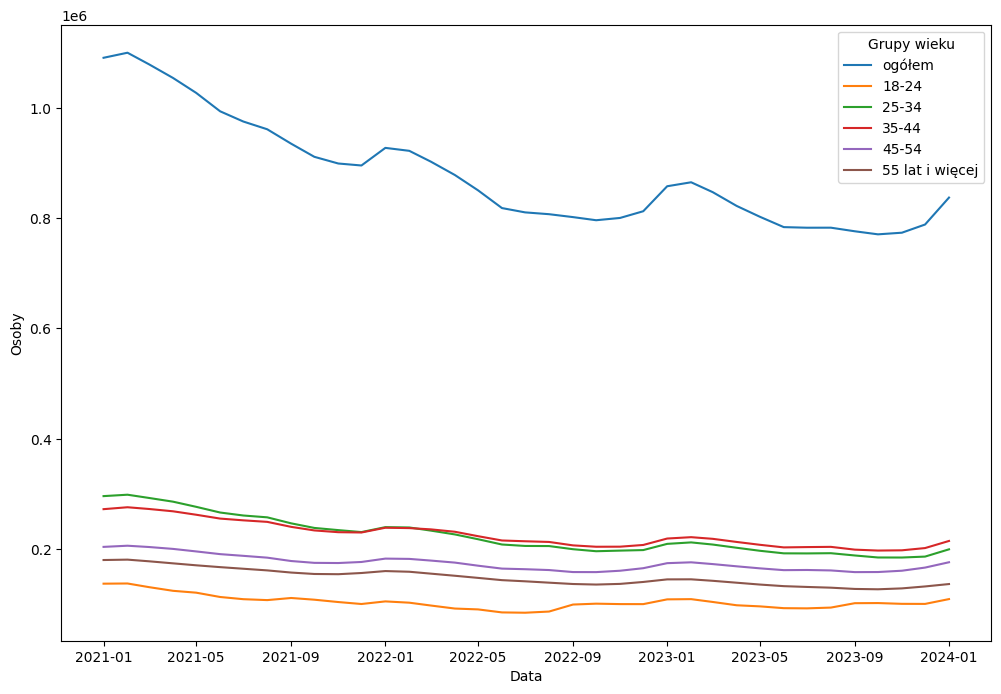

In [9]:
# Preparing line plot for number of unemployed people over the years 2021-2024
fig = plt.figure(figsize = [12,8])

sns.lineplot(
    x = "Data", 
    y = "Osoby",
    hue = "Grupy wieku",
    data = age[age['Płeć'] == "ogółem"]
)

In [10]:
age.info()

<class 'pandas.core.frame.DataFrame'>
Index: 666 entries, 0 to 862
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   Miesiące     666 non-null    object        
 1   Płeć         666 non-null    object        
 2   Grupy wieku  666 non-null    object        
 3   Year         666 non-null    int64         
 4   Osoby        666 non-null    int32         
 5   Month        666 non-null    int64         
 6   Data         666 non-null    datetime64[ns]
dtypes: datetime64[ns](1), int32(1), int64(2), object(3)
memory usage: 39.0+ KB


Płeć       Grupy wieku    
kobiety    18-24               58340.594595
           25-34              147249.081081
           35-44              134076.459459
           45-54               88429.702703
           55 lat i więcej     45008.729730
           ogółem             473104.567568
mężczyźni  18-24               46189.243243
           25-34               77240.324324
           35-44               92440.675676
           45-54               86353.621622
           55 lat i więcej    103837.108108
           ogółem             406060.972973
ogółem     18-24              104529.837838
           25-34              224489.405405
           35-44              226517.135135
           45-54              174783.324324
           55 lat i więcej    148845.837838
           ogółem             879165.540541
Name: Osoby, dtype: float64


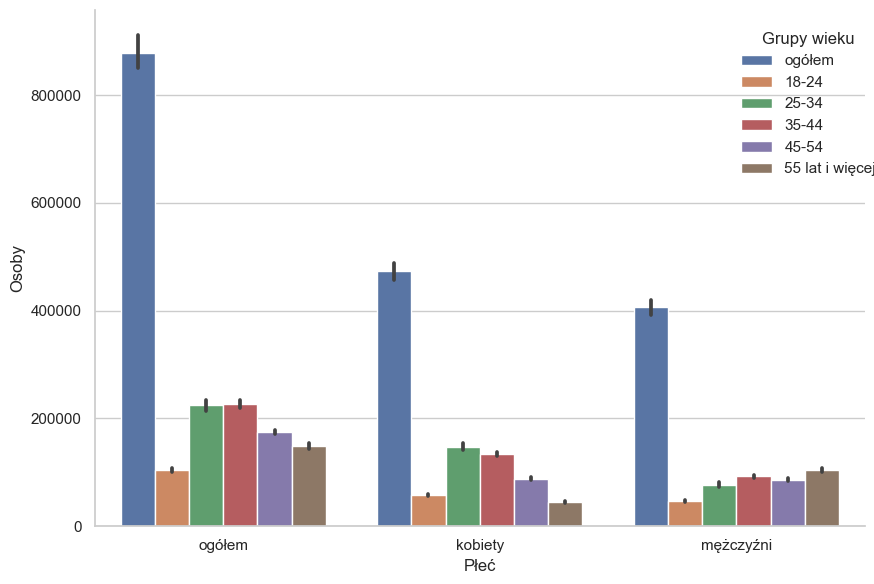

In [34]:
# Average/mean of number of unemployed people for each sex and age - bar plot
sns.set(style="whitegrid")
g = sns.catplot(data=age, x="Płeć", y="Osoby", hue="Grupy wieku", kind="bar", height=6, aspect=1.5, legend="auto")

# Ustawienie legendy w prawym górnym rogu
#g.fig.subplots_adjust(top=0, left=0)

g.legend.set_bbox_to_anchor((0.85, 0.8))

# Group the data by gender and work experience, and calculate the mean
mean_by_gender_and_age = age.groupby(['Płeć', 'Grupy wieku'])['Osoby'].mean()
print(mean_by_gender_and_age)

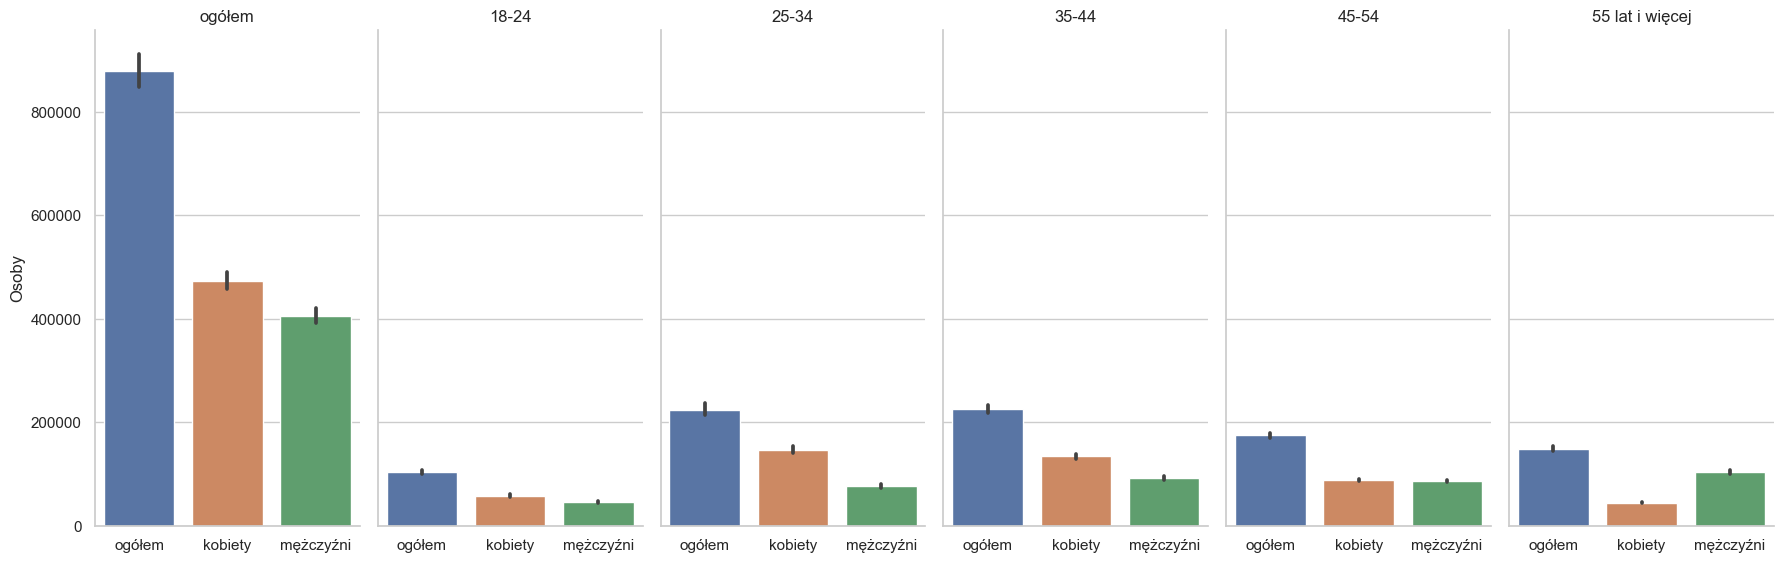

In [12]:
# Mean on different plot
g = sns.catplot(
    data=age, x="Płeć", y="Osoby", col="Grupy wieku",
    kind="bar", height=6, aspect=0.5
)
g.set_axis_labels("", "Osoby")
    
g.set_titles("{col_name}", wrap=True)